In [17]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import geopy

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [3]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Remove continents which have only one country in dataframe.**


In [4]:
# continents with only one country
value_counts = world.value_counts('continent')
to_remove = value_counts[value_counts <= 1].index


In [5]:
# remove these continents
world = world[~world['continent'].isin(to_remove)]
world.value_counts('continent')

continent
Africa           51
Asia             47
Europe           39
North America    18
South America    13
Oceania           7
dtype: int64

**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [6]:
world["rank"] = world.groupby("continent")["pop_est"].rank("dense", ascending=False)
world.sort_values(['continent','rank'])
world_filtered = world[world['rank'].isin([1,2,3])]


**Print the 'world_filtered' dataframe.**

In [7]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,rank
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0...",3.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",1.0
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289...",2.0
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",3.0
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.634 -52.636, -68.250 -53.1...",3.0
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",1.0
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1...",2.0
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",1.0
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26...",2.0
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",3.0


-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

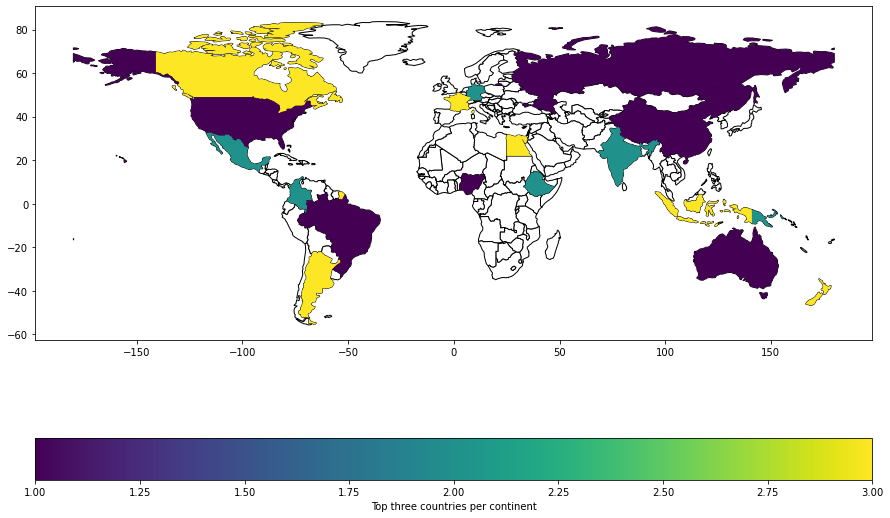

In [29]:
# create figure and axes
fig, ax = plt.subplots(figsize=(15,12))


# add the rest of the countries
world.plot( ax = ax, color='white',edgecolor='black',legend=True, )
# create map from world_filtered data-frame
world_filtered.plot(column='rank',ax = ax ,legend=True,
            legend_kwds={'label': "Top three countries per continent",
                        'orientation': "horizontal"})
plt.show() 

### Plotly

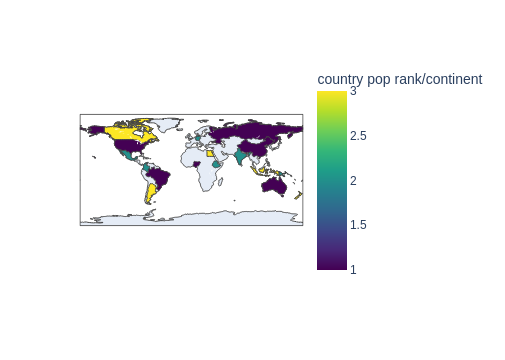

In [43]:
import plotly.express as px

fig = px.choropleth(world_filtered, locations ='iso_a3',
                    color='rank',
                    color_continuous_scale = 'Viridis',
                    labels={'rank':'country pop rank/continent'}
                   )

fig.show()

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

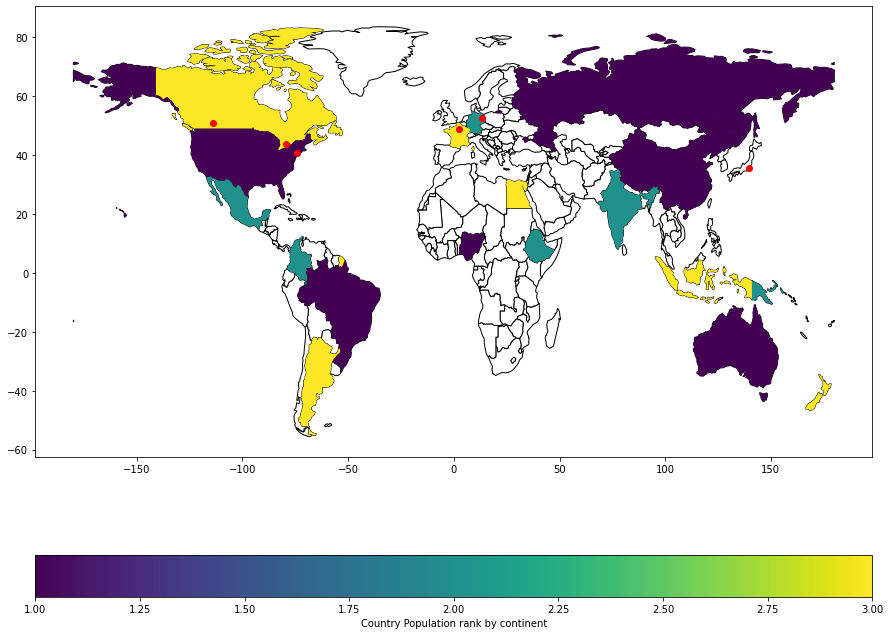

In [39]:
# get geometry
cities = gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'],provider='photon')

# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))


# add the rest of the countries
world.plot( ax = ax, color='white',edgecolor='black',legend=True, )
# create map from world_filtered data-frame
world_filtered.plot(column='rank',ax = ax ,legend=True,
            legend_kwds={'label': "Country Population rank by continent",
                        'orientation': "horizontal"})


# add cities
cities.plot(ax=ax,color='red', legend=True)

plt.show() 


In [33]:
cities

,geometry,address
0,POINT (-74.00602 40.71273),"New York, New York, United States"
1,POINT (13.38886 52.51704),"Berlin, 10117, Berlin, Deutschland"
2,POINT (2.35146 48.85670),"Paris, 75000;75001;75002;75003;75004;75005;750..."
3,POINT (-79.38393 43.65348),"Old Toronto, Toronto, Ontario, Canada"
4,POINT (-114.06547 51.04610),"Calgary, Alberta, Canada"
5,POINT (139.74394 35.68474),"Tokyo MX, 麹町学園通り, 102-0083, 麹町学園通り, 東京都, 日本"
